# 13주차 과제_0526(월)

딥러닝 파이토치 교과서 ch7. 1\~3 p.360\~371과 RNN 실습 코드

# 7.1 시계열 문제

시계열 분석 : 시간에 따라 변하는 데이터를 사용하여 추이를 분석하는 것

- 불규칙 변동 : 시계열 자료에서 시간에 따른 규칙적인 움직임과 달리 어떤 규칙성이 없어 예측 불가능하고 우연적으로 발생하는 변동

    ex) 전쟁, 홍수, 화재, 지진, 파업

- 추세 변동 : 시계열 자료가 갖는 장기적인 변화 추세

    추세란 장기간에 걸쳐 지속적으로 증가, 감소하거나 또는 일정한 상태를 유지하려는 성향을 의미함

    짜라서 짧은 기간 동안에는 추세 변동을 찾기 어렵다는 단점이 있음

    ex) 국내총생상(GDP), 인구증가율

- 순환 변동 : 대체로 2~3년 정도의 일정한 기간을 주기로 순환적으로 나타나는 변동

    1년 이내 주기로 곡선을 그리며 추세 변동에 따라 변동하는 것

    ex) 경기 변동

- 계절 변동 : 시계열 자료에서 보통 계절적 영향과 사회적 관습에 따라 1년 주기로 발생하는 것

    계절에 따라 순환하며 변동하는 특성이 있음


규칙적 시계열 : 트렌드와 분산이 불변하는 데이터

불규칙적 시계열 : 트엔드 혹은 분산이 변환하는 시계열 데이터

# 7.2 AR, MA, ARMA, ARIMA

## 7.2.1 AR 모델

이전 관측 값이 이후 관측 값에 영향을 준다는 아이디어에 대한 모형으로 **자기 회귀 모델**이라고도 함

$$Z_t = \phi_1Z_{t-1}+\phi_2Z_{t-2}+\cdots+\phi_pZ_{t-p}+a_t$$

$Z_t$ : 시계열 데이터에서 현재 시점

$\phi_1Z_{t-1}+\phi_2Z_{t-2}+\cdots+\phi_pZ_{t-p}$ : 과거가 현재에 미치는 영향을 나타내는 모수($\phi$)에 시계열 데이터의 과거 시점을 곱한 것

$a_t$ : 시계열 분석에서 오차 항 의미

p 시점을 기준으로 그 이전의 데이터에 의해 현재 시점의 데이터가 영향을 받는 모형

## 7.2.2 MA 모델

MA(이동 평균) 모델

트렌드(평균 혹은 시계열 그래프에서 y값)가 변화하는 상황에 적합한 회귀 모델

시계열을 따라 윈도우 크기만큼 슬라이딩 됨

$$Z_t = \theta_1Z_{t-1}+\theta_2Z_{t-2}+\cdots+\theta_pZ_{t-p}+a_t$$

$Z_t$ : 시계열 데이터에서 현재 시점

$\theta_1Z_{t-1}+\theta_2Z_{t-2}+\cdots+\theta_pZ_{t-p}$ : 매개변수($\theta$)에 과거 시점의 오차를 곱한 것

$a_t$ : 오차 항

이전 데이터의 오차에서 현재 데이터의 상태를 추론

## 7.2.3 ARMA 모델

ARMA(자기 회귀 이동 평균) : AR과 MA를 섞은 모델

$$Z_t = \phi_1Z_{t-1}+\phi_2Z_{t-2}+\cdots+\phi_pZ_{t-p}+\theta_1Z_{t-1}+\theta_2Z_{t-2}+\cdots+\theta_pZ_{t-p}+a_t$$

## 7.2.4 ARIMA 모델

ARIMA(자기 회귀 누적 이동 평균)

자기 회귀와 이동 평균을 둘 다 고려하는데 ARMA와 달리 과거 데이터의 선형 관계뿐만 아니라 추세까지 고려함

[구현 절치]

1. ARIMA(p, d, q) 함수 호출

    p : 자기 회귀 차수

    d : 차분 차수

    q : 이동 평균 차수

2. fit() 매서드를 호출하고 모델에 데이터를 적용하여 훈련

3. predict() 매서드를 호출하여 미래의 추세 및 동향에 대해 예측

In [1]:
!pip install statsmodels

Cloning into '080289'...
remote: Enumerating objects: 2278, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 2278 (delta 4), reused 27 (delta 3), pack-reused 2246 (from 1)
Receiving objects: 100% (2278/2278), 330.30 MiB | 27.90 MiB/s, done.
Resolving deltas: 100% (13/13), done.
Updating files: 100% (2591/2591), done.
/content/080289/chap05/data/catanddog


<ipython-input-2-e0430941ba86>:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = read_csv('/content/080289/chap07/data/sales.csv', header=0, parse_dates=[0], index_col=0,
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -199.651
Date:                Fri, 30 May 2025   AIC                            411.302
Time:                        07:49:29   BIC                            420.634
Sample:                    01-01-1991   HQIC                           414.523
                         - 12-01-1993                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8788      0.227     -3.876      0.000      -1.323      -0.434
ar.L2         -0.2787      0.232     -1.203      0.229      -0.733       0.176
ar.L3         -0.0076      0.270     -0.028      0.9

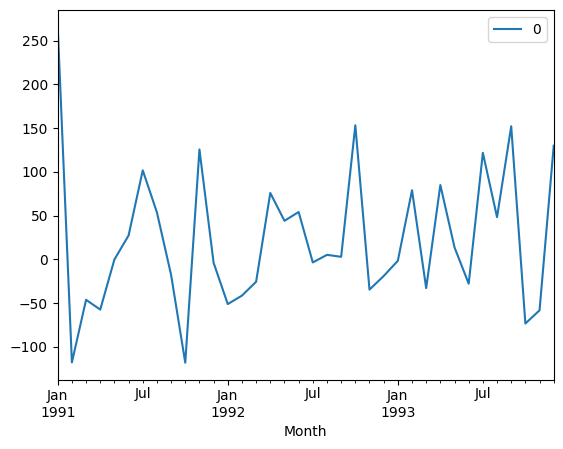

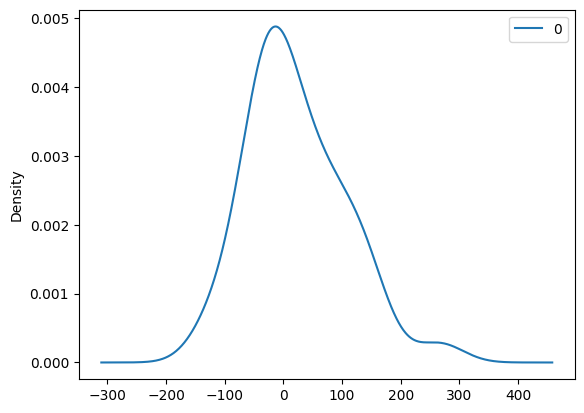

                0
count   36.000000
mean    22.459086
std     82.505331
min   -118.213281
25%    -33.308343
50%      1.361178
75%     76.704967
max    266.000000


In [2]:
from datetime import datetime
# ARIMA() 함수를 호출하여 sales 데이터셋에 대한 예측

from pandas import read_csv
from pandas import DatetimeIndex
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

def parser(x):
    return datetime.strptime('199'+x, '%Y-%m')

!git clone https://github.com/gilbutITbook/080289.git
%cd 080289/chap05/data/catanddog/

df = read_csv('/content/080289/chap07/data/sales.csv', header=0, parse_dates=[0], index_col=0,
                  date_parser=parser)

series = df.iloc[:, 0]

model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

Cloning into '080289'...
remote: Enumerating objects: 2278, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 2278 (delta 4), reused 27 (delta 3), pack-reused 2246 (from 1)
Receiving objects: 100% (2278/2278), 330.30 MiB | 24.88 MiB/s, done.
Resolving deltas: 100% (13/13), done.
Updating files: 100% (2591/2591), done.
/content/080289/chap05/data/catanddog/080289/chap05/data/catanddog
predicted=352.855343, expected=346.300000


<ipython-input-3-5783df80189c>:16: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = read_csv('/content/080289/chap07/data/sales.csv', header=0, parse_dates=[0], index_col=0,


predicted=277.398036, expected=329.700000
predicted=368.753734, expected=445.400000
predicted=331.773635, expected=325.900000
predicted=372.070407, expected=449.300000
predicted=360.020872, expected=411.300000
predicted=454.526230, expected=417.400000
predicted=388.690699, expected=545.500000
predicted=437.632447, expected=477.600000
predicted=516.437624, expected=687.000000
predicted=520.916191, expected=435.300000
predicted=675.594647, expected=587.300000
predicted=505.201016, expected=676.900000
Test MSE: 9118.818
Test MSE: 9118.818


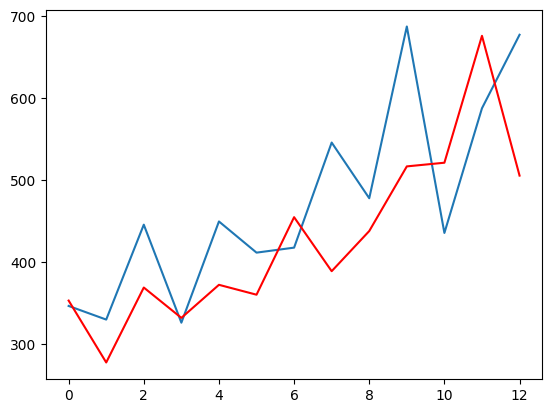

In [3]:
# statsmodels 라이브러리를 이용한 sales 데이터셋 예측

import numpy as np
from pandas import read_csv
from pandas import DatetimeIndex
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

def parser(x):
    return datetime.strptime('199'+x, '%Y-%m')

!git clone https://github.com/gilbutITbook/080289.git
%cd 080289/chap05/data/catanddog/

df = read_csv('/content/080289/chap07/data/sales.csv', header=0, parse_dates=[0], index_col=0,
                  date_parser=parser)

series = df.iloc[:, 0]

X = series.values
X = np.nan_to_num(X)

size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)  # 모델 실행 결과를 predicted로 출력하고, test로 분리해 둔 데이터를 expected로 사용하여 출력

error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

# 7.3 순환 신경망(RMM)

시간적으로 연속성이 있는 데이터를 처리하려고 고안된 인공 신경망

Recurrent(반복되는) : 이전 은닉층이 현재 은닉층의 입력이 되면서 반복되는 순환 구조를 갖는다는 의미

기존 네트워크와 다르게 기억(현재까지 입력 데이터를 요약한 정보)을 가짐

새로운 입력이 네트워크로 들어올 때마다 기억은 조금씩 수정되며 최종적으로 남겨진 기억은 모든 입력 전체를 요약한 정보가 됨

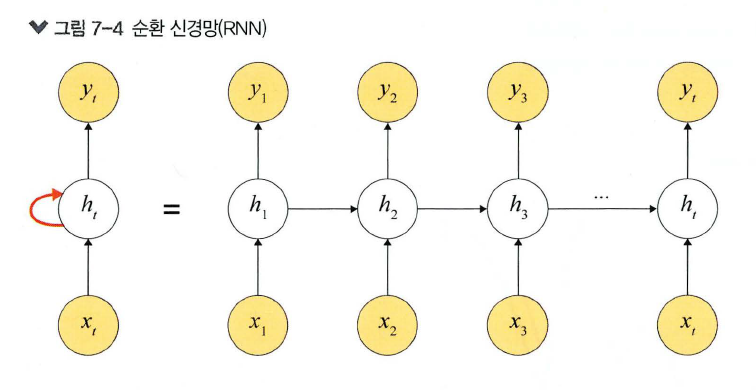

RNN 유형

1. 일대일 : 순환이 없기 때문에 RNN이라 말하기 어려움

    ex) 순방향 네트워크

2. 일대다 : 입력이 하나이고 출력이 다수인 구조

    ex) 이미지를 입력해서 이미지에 대한 설명을 문장으로 출력하는 이미지 캡션

3. 다대일 : 입력이 다수이고 출력이 하나인 구조

    ex) 문장을 입력해서 긍정/부정을 출력하는 감성 분석기

```
self.em = nn.Embedding(len(TEXXT.vocab.stoi), embeding_dim) # 임베딩 처리
self.rnn = nn.RNNCell(input_dim, hidden_size) # RNN 적용
self.fc1 = nn.Linear(hidden_size, 256) # 완전연결층
self.fc2 = nn.Linear(256, 3) # 출력층
```
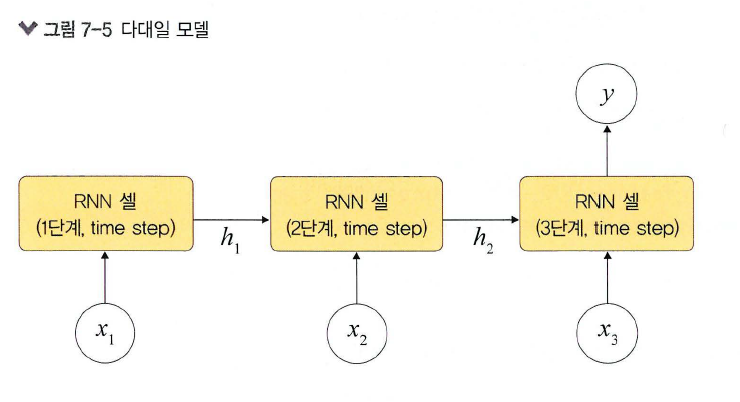

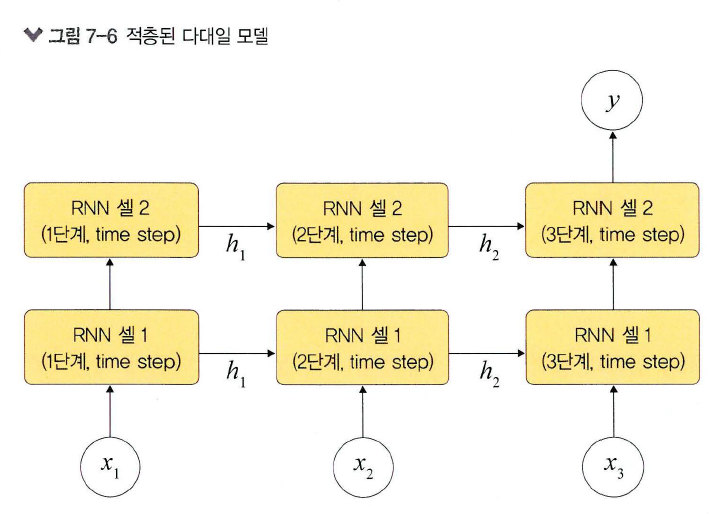

4. 다대다 : 입력과 출력이 다수인 구조

    ex) 언어를 번역하는 자동 번역기

```
Seq2Seq(
    (encoder) : Encoder(
        (embedding) : Embedding(7855, 256)
        (rnn) : LSTM(256, 512, num_layers = 2, dropout = 0.5)
        (dropout) : Dropout(p = 0.5, inplace = False)
    )
    (decoder) : Decoder(
        (embedding) : Embedding(5893, 256)
        (rnn) : LSTM(256, 512, num_layers = 2, dropout = 0.5)
        (fc_out) : Linear(in_features = 512, out_features = 5893, bias = True)
        (dropout) : Dropout(p = 0.5, inplace = False)
    )
)
```

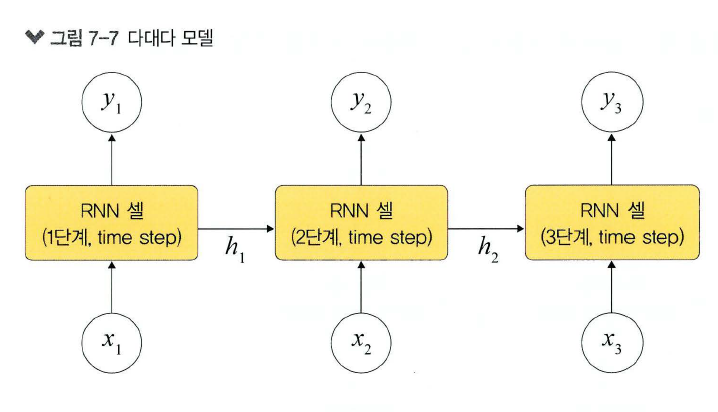

5. 동기화 다다대 : 입력과 출력이 다수인 구조

    ex) 문장에서 다음에 나올 단어를 예측하는 언어 모델, 프레임 수준의 비디오 분류

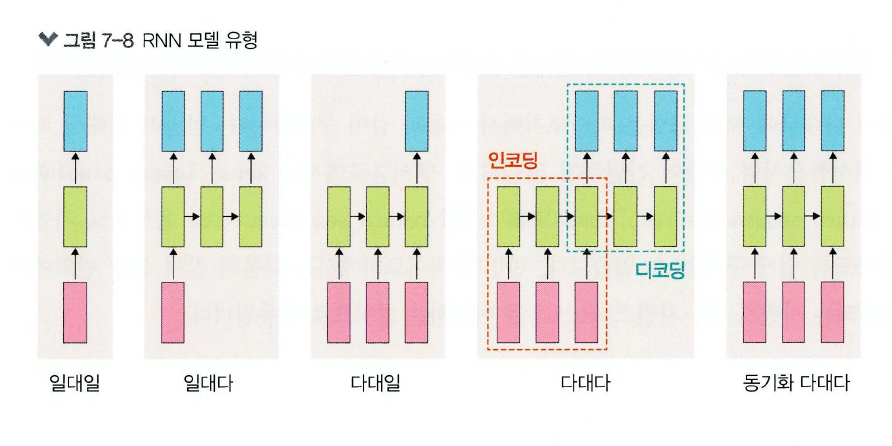

## 7.3.1 RNN 계층과 셀

내장된 계층뿐만 아니라 셀 레벌의 API도 제공

RNN계층이 입력된 배치 순서대로 모두 철리하는 것과 다르게 RNN 셀은 오직 하나의 단계만 처리함

$\therefore$ RNN 셀은 RNN 계층의 for loop 구문을 갖는 구조

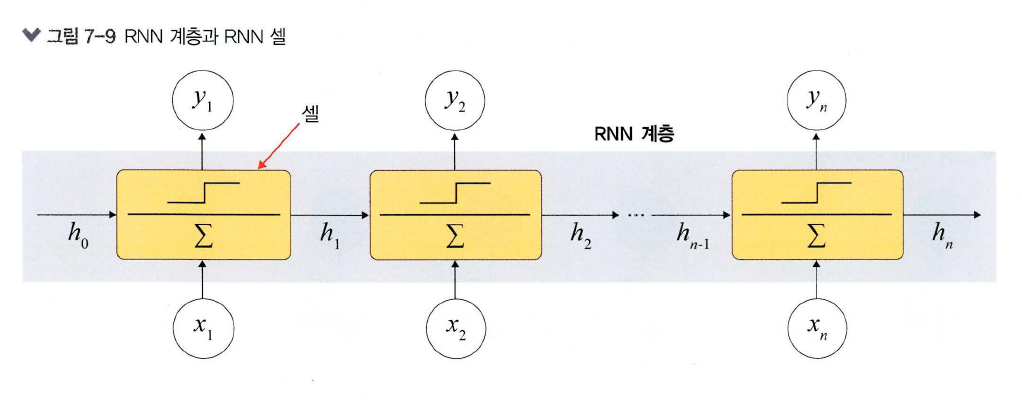

RNN 계층은 셀으르 래핑하여 동일한 셀을 여러 단계에 적용함

즉 셀은 실제 계산에 사용되는 RNN 계층의 구성요소로 단일 입력과 과거 상태를 가져와서 출력과 새로운 상태를 생성함

셀 유형
- nn.RNNCell : SimpleRNN 계층에 대응되는 RNN 셀
- nn.GRUCell : GRU 게층에 대응되는 GRU 셀
- nn.LSTMCell : LSTM 계층에 대응되는 LSTM 셀

________

# RNN 실습 코드

## 문자 단위 RNN(Char RNN)

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

### 1. 훈련 데이터 전처리하기

In [5]:
input_str = 'apple'
label_str = 'pple!'
char_vocab = sorted(list(set(input_str+label_str)))
vocab_size = len(char_vocab)
print ('문자 집합의 크기 : {}'.format(vocab_size))

문자 집합의 크기 : 5


In [6]:
input_size = vocab_size # 입력의 크기는 문자 집합의 크기
hidden_size = 5
output_size = 5
learning_rate = 0.1

In [7]:
char_to_index = dict((c, i) for i, c in enumerate(char_vocab)) # 문자에 고유한 정수 인덱스 부여
print(char_to_index)

{'!': 0, 'a': 1, 'e': 2, 'l': 3, 'p': 4}


In [8]:
index_to_char={}
for key, value in char_to_index.items():
    index_to_char[value] = key
print(index_to_char)

{0: '!', 1: 'a', 2: 'e', 3: 'l', 4: 'p'}


In [9]:
x_data = [char_to_index[c] for c in input_str]
y_data = [char_to_index[c] for c in label_str]
print(x_data)
print(y_data)

[1, 4, 4, 3, 2]
[4, 4, 3, 2, 0]


In [10]:
# 배치 차원 추가
# 텐서 연산인 unsqueeze(0)를 통해 해결할 수도 있었음.
x_data = [x_data]
y_data = [y_data]
print(x_data)
print(y_data)

[[1, 4, 4, 3, 2]]
[[4, 4, 3, 2, 0]]


In [11]:
x_one_hot = [np.eye(vocab_size)[x] for x in x_data]
print(x_one_hot)

[array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.]])]


In [12]:
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)

<ipython-input-12-c1bfbd518a63>:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  X = torch.FloatTensor(x_one_hot)


In [13]:
print('훈련 데이터의 크기 : {}'.format(X.shape))
print('레이블의 크기 : {}'.format(Y.shape))

훈련 데이터의 크기 : torch.Size([1, 5, 5])
레이블의 크기 : torch.Size([1, 5])


### 2. 모델 구현하기

In [14]:
class Net(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.rnn = torch.nn.RNN(input_size, hidden_size, batch_first=True) # RNN 셀 구현
        self.fc = torch.nn.Linear(hidden_size, output_size, bias=True) # 출력층 구현

    def forward(self, x): # 구현한 RNN 셀과 출력층을 연결
        x, _status = self.rnn(x)
        x = self.fc(x)
        return x

In [15]:
net = Net(input_size, hidden_size, output_size)

In [16]:
outputs = net(X)
print(outputs.shape) # 3차원 텐서

torch.Size([1, 5, 5])


In [17]:
print(outputs.view(-1, input_size).shape) # 2차원 텐서로 변환

torch.Size([5, 5])


In [18]:
print(Y.shape)
print(Y.view(-1).shape)

torch.Size([1, 5])
torch.Size([5])


In [19]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), learning_rate)

In [20]:
for i in range(100):
    optimizer.zero_grad()
    outputs = net(X)
    loss = criterion(outputs.view(-1, input_size), Y.view(-1)) # view를 하는 이유는 Batch 차원 제거를 위해
    loss.backward() # 기울기 계산
    optimizer.step() # 아까 optimizer 선언 시 넣어둔 파라미터 업데이트

    # 아래 세 줄은 모델이 실제 어떻게 예측했는지를 확인하기 위한 코드.
    result = outputs.data.numpy().argmax(axis=2) # 최종 예측값인 각 time-step 별 5차원 벡터에 대해서 가장 높은 값의 인덱스를 선택
    result_str = ''.join([index_to_char[c] for c in np.squeeze(result)])
    print(i, "loss: ", loss.item(), "prediction: ", result, "true Y: ", y_data, "prediction str: ", result_str)

0 loss:  1.6856029033660889 prediction:  [[2 2 2 2 2]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  eeeee
1 loss:  1.4558098316192627 prediction:  [[4 4 4 4 4]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  ppppp
2 loss:  1.3593934774398804 prediction:  [[4 4 4 4 4]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  ppppp
3 loss:  1.271803617477417 prediction:  [[4 4 4 4 4]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  ppppp
4 loss:  1.116466999053955 prediction:  [[4 4 4 4 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pppp!
5 loss:  0.9379452466964722 prediction:  [[4 4 4 4 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pppp!
6 loss:  0.7606185078620911 prediction:  [[4 4 4 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pppe!
7 loss:  0.5969608426094055 prediction:  [[4 4 4 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pppe!
8 loss:  0.47322550415992737 prediction:  [[4 4 4 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pppe!
9 loss:  0.37741798162460327 prediction:  [[4 4 4 2 0]] 

## 더 많은 데이터로 학습한 문자 단위 RNN(Char RNN)

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim

### 1. 훈련 데이터 전처리하기

In [22]:
sentence = ("if you want to build a ship, don't drum up people together to "
            "collect wood and don't assign them tasks and work, but rather "
            "teach them to long for the endless immensity of the sea.")

In [23]:
char_set = list(set(sentence)) # 중복을 제거한 문자 집합 생성
char_dic = {c: i for i, c in enumerate(char_set)} # 각 문자에 정수 인코딩

In [24]:
print(char_dic) # 공백도 여기서는 하나의 원소

{'a': 0, 'g': 1, 'k': 2, 'n': 3, ' ': 4, 't': 5, 'r': 6, ',': 7, 'o': 8, 'f': 9, 'b': 10, '.': 11, 'l': 12, 'd': 13, 'y': 14, 'i': 15, 'e': 16, 'h': 17, 'w': 18, 'm': 19, 'p': 20, 'c': 21, 's': 22, "'": 23, 'u': 24}


In [25]:
dic_size = len(char_dic)
print('문자 집합의 크기 : {}'.format(dic_size))

문자 집합의 크기 : 25


In [26]:
# 하이퍼파라미터 설정
hidden_size = dic_size
sequence_length = 10  # 임의 숫자 지정
learning_rate = 0.1

In [27]:
# 데이터 구성
x_data = []
y_data = []

for i in range(0, len(sentence) - sequence_length):
    x_str = sentence[i:i + sequence_length]
    y_str = sentence[i + 1: i + sequence_length + 1]
    print(i, x_str, '->', y_str)

    x_data.append([char_dic[c] for c in x_str])  # x str to index
    y_data.append([char_dic[c] for c in y_str])  # y str to index

0 if you wan -> f you want
1 f you want ->  you want 
2  you want  -> you want t
3 you want t -> ou want to
4 ou want to -> u want to 
5 u want to  ->  want to b
6  want to b -> want to bu
7 want to bu -> ant to bui
8 ant to bui -> nt to buil
9 nt to buil -> t to build
10 t to build ->  to build 
11  to build  -> to build a
12 to build a -> o build a 
13 o build a  ->  build a s
14  build a s -> build a sh
15 build a sh -> uild a shi
16 uild a shi -> ild a ship
17 ild a ship -> ld a ship,
18 ld a ship, -> d a ship, 
19 d a ship,  ->  a ship, d
20  a ship, d -> a ship, do
21 a ship, do ->  ship, don
22  ship, don -> ship, don'
23 ship, don' -> hip, don't
24 hip, don't -> ip, don't 
25 ip, don't  -> p, don't d
26 p, don't d -> , don't dr
27 , don't dr ->  don't dru
28  don't dru -> don't drum
29 don't drum -> on't drum 
30 on't drum  -> n't drum u
31 n't drum u -> 't drum up
32 't drum up -> t drum up 
33 t drum up  ->  drum up p
34  drum up p -> drum up pe
35 drum up pe -> rum up peo
36

In [28]:
print(x_data[0])
print(y_data[0])

[15, 9, 4, 14, 8, 24, 4, 18, 0, 3]
[9, 4, 14, 8, 24, 4, 18, 0, 3, 5]


In [29]:
x_one_hot = [np.eye(dic_size)[x] for x in x_data] # x 데이터는 원-핫 인코딩
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)

In [30]:
print('훈련 데이터의 크기 : {}'.format(X.shape))
print('레이블의 크기 : {}'.format(Y.shape))

훈련 데이터의 크기 : torch.Size([170, 10, 25])
레이블의 크기 : torch.Size([170, 10])


In [31]:
print(X[0])

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [32]:
print(Y[0])

tensor([ 9,  4, 14,  8, 24,  4, 18,  0,  3,  5])


### 2. 모델 구현하기

In [33]:
class Net(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, layers): # 현재 hidden_size는 dic_size와 같음.
        super(Net, self).__init__()
        self.rnn = torch.nn.RNN(input_dim, hidden_dim, num_layers=layers, batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim, hidden_dim, bias=True)

    def forward(self, x):
        x, _status = self.rnn(x)
        x = self.fc(x)
        return x

In [34]:
net = Net(dic_size, hidden_size, 2) # 이번에는 층을 두 개 쌓습니다.

In [35]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), learning_rate)

In [36]:
outputs = net(X)
print(outputs.shape) # 3차원 텐서

torch.Size([170, 10, 25])


In [37]:
print(outputs.view(-1, dic_size).shape) # 2차원 텐서로 변환.

torch.Size([1700, 25])


In [38]:
print(Y.shape)
print(Y.view(-1).shape)

torch.Size([170, 10])
torch.Size([1700])


In [39]:
for i in range(100):
    optimizer.zero_grad()
    outputs = net(X) # (170, 10, 25) 크기를 가진 텐서를 매 에포크마다 모델의 입력으로 사용
    loss = criterion(outputs.view(-1, dic_size), Y.view(-1))
    loss.backward()
    optimizer.step()

    # results의 텐서 크기는 (170, 10)
    results = outputs.argmax(dim=2)
    predict_str = ""
    for j, result in enumerate(results):
        if j == 0: # 처음에는 예측 결과를 전부 가져오지만
            predict_str += ''.join([char_set[t] for t in result])
        else: # 그 다음에는 마지막 글자만 반복 추가
            predict_str += char_set[result[-1]]

    print(predict_str)

wwwswswssswwsssssssswswsswswsswsswwswswsssssswssswsssswsswswssssswswswsssswswswswsswwssswssswssswssssswssswsslswssswwsswsswswsssswsssswssssssswsssswsswswswswswsswswswwsssswssswssw
 d d d d d ddd dd d ddddd d  dddd dd   dd  d  dd  dd   d  ddd dddd    dddd dd ddddd ddd ddd dd  ddddd ddd ddd d dd  d ddd  ddd d  dd  ddd d d  d d dd  d dd  d d  d d  d dd dd  d  
toto oo  ooloototootlotoolothoooooohtlohoototohtehoohoootoloohoootoohteohotottlo hooohothotooetotoohllohtotoohoeohtotooootoooohoethotohoohotootothlootoetholohtb hotohooooohoothloh
t                                                                                                                                                                                  
wnwdf woysfbonsfifowfsfifiamyifif f amasysffswomysfssf amasasf.mamwsfsssfomss f asfiwsfifowsfownshssf aof fowifsasaia fiaiasanyfowoasasfssdmaiwofht nmfiwfasysfoipamfsfisffbonsysws
totnrllntnn  n o monoot n eot too t d n  on ndonn onoo oon nnnondod oto oonno t don t dotot nnm nnnn